# Day 5: Linear & Logistic Regression - Intuition & Applications

**Welcome to Day 5 of your ML journey!** Today we'll dive deep into two of the most fundamental algorithms in machine learning: 
``Linear Regression`` and ``Logistic Regression``

 These models form the backbone of predictive analytics and understanding them will give you a solid foundation for more advanced techniques.

---

**Goal:** Master the intuition, mathematics, and practical applications of Linear and Logistic Regression.

**Topics Covered:**
- Mathematical intuition behind linear models
- Linear Regression for continuous predictions
- Logistic Regression for classification
- When to use each algorithm
- Feature interpretation and coefficients
- Regularization techniques (L1/L2)
- Real-world applications and examples


---

## 1. Concept Overview

### What is Linear Regression?

**Linear Regression** is the simplest and most widely used algorithm for predicting continuous numerical values. Think of it as finding the "best line" that passes through your data points.

**The Core Idea:**
- If you have data points scattered on a graph, Linear Regression finds the straight line that best fits those points
- Once you have this line, you can predict new values by plugging in new inputs

**Real-World Example:**
- **Real Estate:** Predicting house prices based on size, location, bedrooms
- **Finance:** Forecasting stock prices based on market indicators
- **Marketing:** Estimating sales based on advertising spend
- **Healthcare:** Predicting patient recovery time based on age and treatment

### What is Logistic Regression?

**Logistic Regression** is Linear Regression's cousin, but instead of predicting numbers, it predicts **categories** or **probabilities**.

**The Core Idea:**
- Instead of drawing a straight line, it draws an S-shaped curve (sigmoid)
- This curve squashes any input into a probability between 0 and 1
- We then use this probability to make categorical predictions

**Real-World Example:**
- **Email:** Spam vs. Not Spam classification
- **Medicine:** Disease diagnosis (Sick vs. Healthy)
- **Finance:** Credit approval (Approved vs. Denied)
- **Marketing:** Customer churn prediction (Will Leave vs. Will Stay)


### The Mathematical Intuition

#### Linear Regression Formula

**Simple Linear Regression (1 feature):**
$$
y = mx + b
$$

**Multiple Linear Regression (many features):**
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon
$$

**Where:**
- $y$ = predicted value (target)
- $\beta_0$ = intercept (bias term)
- $\beta_1, \beta_2, ..., \beta_n$ = coefficients (feature weights)
- $x_1, x_2, ..., x_n$ = input features
- $\epsilon$ = error term

#### Logistic Regression Formula

**Probability Calculation:**
$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}}
$$

**Where:**
- $p$ = probability of positive class (between 0 and 1)
- The exponential function creates the S-shaped curve
- When probability > 0.5, predict class 1; otherwise predict class 0

### Key Differences

| Aspect | Linear Regression | Logistic Regression |
|--------|-------------------|-------------------|
| **Output** | Continuous values (numbers) | Probabilities (0-1) or categories |
| **Problem Type** | Regression | Classification |
| **Line Shape** | Straight line | S-shaped curve (sigmoid) |
| **Use Cases** | Price prediction, forecasting | Spam detection, diagnosis |
| **Interpretation** | Direct relationship | Log-odds relationship |


### When to Use Each Algorithm

#### Use Linear Regression When:

**Continuous Target Variable**
- Predicting prices, temperatures, sales amounts
- Any numerical outcome you want to forecast

**Linear Relationship Expected**
- Features have a roughly linear relationship with the target
- Simple, interpretable models are preferred

**Baseline Model Needed**
- Quick prototyping and benchmarking
- Understanding feature importance

#### Use Logistic Regression When:

**Binary Classification**
- Two possible outcomes (yes/no, spam/not spam)
- Need probability estimates, not just predictions

**Interpretable Model Required**
- Understanding which features drive decisions
- Regulatory compliance (finance, healthcare)

**Linear Decision Boundary**
- Classes can be separated by a straight line (in feature space)
- Features have roughly linear relationship with log-odds

### Real-World Applications

#### Linear Regression in Action

**1. Real Estate Pricing**
- **Features:** Square footage, bedrooms, bathrooms, location
- **Target:** House price
- **Insight:** "Each additional bedroom adds $15,000 to the price"

**2. Sales Forecasting**
- **Features:** Advertising spend, seasonality, competitor activity
- **Target:** Monthly sales revenue
- **Insight:** "Every $1,000 in ads generates $3,200 in sales"

#### Logistic Regression in Action

**1. Email Spam Detection**
- **Features:** Word frequency, sender reputation, email length
- **Target:** Spam (1) or Not Spam (0)
- **Insight:** "Emails with 'FREE' in subject have 85% spam probability"

**2. Medical Diagnosis**
- **Features:** Age, blood pressure, cholesterol, symptoms
- **Target:** Disease present (1) or not (0)
- **Insight:** "Age increases disease risk by 12% per decade"


---

## 2. Code Demo: Linear Regression

Let's start with Linear Regression using a real dataset to predict house prices.


In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ All libraries imported successfully")


✓ All libraries imported successfully


### Step 1: Load and Explore the California Housing Dataset


In [28]:
# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Features: {list(housing.feature_names)}")
print(f"Target: Median house value (in $100,000s)")

print("\nFirst 5 rows:")
display(df.head())

print("\nBasic Statistics:")
display(df.describe())


Dataset Overview:
Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in $100,000s)

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Basic Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Step 2: Visualize the Data


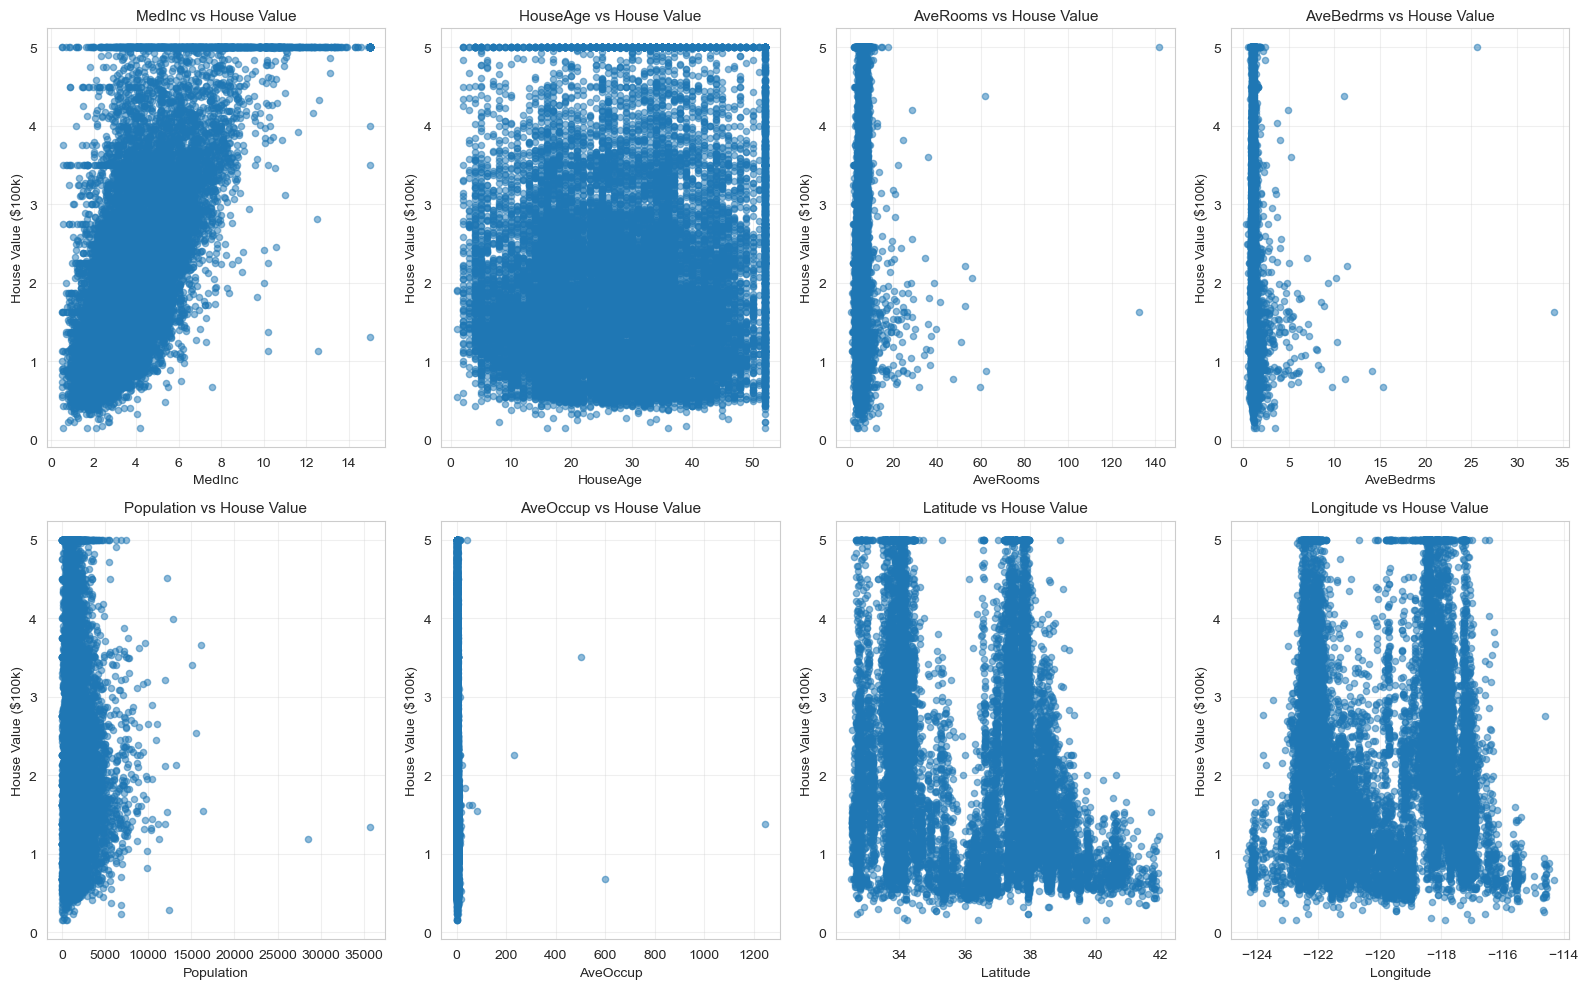

In [29]:
# Visualize relationships between features and target
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(housing.feature_names):
    axes[i].scatter(df[feature], df['target'], alpha=0.5, s=20)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('House Value ($100k)', fontsize=10)
    axes[i].set_title(f'{feature} vs House Value', fontsize=11)
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Let me build Guide for you to Understanding Key Features!

I know what you're thinking right now: "Whoa, that's a lot of dots and lines! What are these graphs even trying to tell me?" <br>
Don't worry – you're not alone! It might look a bit complex at first glance, but here's the thing: **it's actually much simpler than it appears.** Think of it like a recipe – once you understand each ingredient and step, you'll see it's just a clever way to understand what makes a house valuable in the real world.

This set of 8 scatter plots is our secret ingredient list! Each plot helps us visualize how a different characteristic of a house or its neighborhood (that's our 'ingredient' on the horizontal, or x-axis) relates to its `House Value ($100k)` (that's our 'final dish' on the vertical, or y-axis). So, if you see a '5' on the y-axis, that means a house value of $500,000.

---

### A Crucial Observation: The "Price Ceiling"

Before we dive into the individual plots, there's a super important detail you might have noticed:

*   The `House Value` on the y-axis **appears to be capped at 5** (representing $500,000).

What does this mean? It's like our dataset has a "price ceiling." Any house with an actual value greater than $500,000 is recorded as $500,000. This isn't a mistake in the data collection, but it's a **critical piece of context** for our "recipe"!

**Why is this important for our data science journey?**

*   **Prediction Limits:** Our future machine learning model won't be able to predict house values *above* $500,000, because it's never seen any in the training data.
*   **Skewed Relationships:** For very expensive homes, the true relationship between features and value might be hidden or distorted because all values above $500,000 are squashed down to that limit. We need to keep this in mind when interpreting the strength of relationships, especially at the higher end of the value spectrum.

---

### What to Look For in Each Plot (Your "Recipe Steps"):

As you look at each scatter plot, ask yourself these questions. They'll help you understand the story each graph is telling:

*   **What's the Trend? (Is it going up, down, or nowhere?)**
    *   **Positive Relationship:** Do the dots generally go upwards from left to right? This means as the feature (x-axis) increases, the `House Value` (y-axis) also tends to increase.
    *   **Negative Relationship:** Do the dots generally go downwards from left to right? This means as the feature increases, the `House Value` tends to decrease.
    *   **No Clear Pattern:** Are the dots just scattered randomly? This suggests the feature might not have a strong, direct relationship with `House Value`.

*   **How Strong is the Relationship? (Are the dots tightly packed or spread out?)**
    *   **Strong:** If the dots are tightly clustered around a visible line or curve, it indicates a strong relationship. Changes in the feature are closely linked to changes in `House Value`.
    *   **Weak:** If the dots are widely scattered, even if there's a general trend, the relationship is weak. The feature might influence `House Value`, but many other factors are also at play.

*   **What's the Shape? (Is it a straight line or a curve?)**
    *   **Linear:** If the dots seem to follow a straight line, the relationship is linear. Simple models might work well here.
    *   **Non-linear:** If the dots follow a curve (like a U-shape or an S-shape), the relationship is non-linear. More complex models might be needed to capture this.

*   **Are there any Outliers or Clusters? (Any unusual 'ingredients' or groups?)**
    *   **Outliers:** Are there individual dots far away from the main group? These could be unusual houses or data entry errors. They can sometimes heavily influence our models!
    *   **Clusters:** Do you see distinct groups of dots forming separate clumps? This might indicate different segments or types of houses within our data.

---

### Why These Observations Are Important for Data Science & Machine Learning (The "So What?"):

Understanding these plots is like being a detective for your data. Every observation helps us make smarter decisions for our machine learning models!

*   **Feature Selection (Choosing the Best Ingredients):**
    *   Features with strong, clear relationships are often excellent predictors of `House Value`. They're the "star ingredients" for our model.
    *   Features with weak or no clear patterns might not be very useful. We might consider excluding them to simplify our model and prevent it from getting confused by irrelevant information.

*   **Model Choice (Picking the Right Cooking Method):**
    *   If most relationships are linear, a simpler model like Linear Regression might be a good starting point.
    *   If we see many non-linear patterns, we might need more flexible models (like polynomial regression or tree-based models) that can capture those curves.

*   **Data Preprocessing (Preparing Our Ingredients):**
    *   Remember that "price ceiling" at $500,000? That's a form of **data censoring**. We need to be aware of it because it limits what our model can learn. We might need to transform the data or use specific modeling techniques that can handle censored data.
    *   Outliers might need to be investigated, corrected, or handled specially (e.g., by robust models) to prevent them from throwing off our predictions.

*   **Understanding the World (The Grand Finale!):**
    *   Ultimately, these plots help us build an intuitive understanding of what truly drives house prices. This exploratory data analysis (EDA) is our first, crucial step in answering that question and building a model that makes sense!

By the end of this, you'll not only understand these graphs, but you'll be able to look at similar data and extract meaningful insights yourself! Let's dive in!

---

## Now Let's Decode Each Plot! 

### 1. MedInc vs House Value - "The Income Story"

**What's happening here?**
*   Look at this plot – it's like a beautiful upward staircase! As `MedInc` (Median Income) goes up, so does `House Value`. This makes total sense, right? People with higher incomes can afford more expensive houses.
*   The relationship is **strong and linear** – you can almost draw a straight line through most of the dots.
*   Notice how many dots are clustered at the top (House Value = 5)? That's our "price ceiling" effect – many expensive houses in high-income areas are being capped at $500,000.

**Why this matters for our ML model:**
*   This is a **goldmine feature**! `MedInc` is likely going to be one of our best predictors.
*   But remember that ceiling effect – our model might struggle to predict values above $500,000, even in very wealthy areas.

---

### 2. HouseAge vs House Value - "The Age Mystery"

**What's happening here?**
*   Hmm, this one's tricky! The dots are scattered all over the place. You can't really draw a clear line through them.
*   There are some dense vertical bands around certain ages (15-20 years, around 50 years), which suggests these are common house ages in our dataset.
*   The relationship is **weak and unclear** – age alone doesn't seem to tell us much about value.

**Why this matters for our ML model:**
*   `HouseAge` might not be a great standalone predictor, but don't write it off completely!
*   The relationship might be **non-linear** – maybe very old houses are valuable (historic charm), or very new houses are expensive (modern features), while middle-aged houses are just... middle-aged.
*   We might need to get creative with this feature – perhaps creating age categories or combining it with other features.

---

### 3. AveRooms vs House Value - "Size Matters, But..."

**What's happening here?**
*   There's a **weak positive trend** – more rooms generally means higher value, but it's not super strong.
*   Most houses have between 0-10 average rooms, with the data heavily concentrated in this range.
*   Look at those lonely dots way out to the right (high AveRooms) – those are potential **outliers**! Maybe mansions or data errors.

**Why this matters for our ML model:**
*   `AveRooms` might contribute some value, especially in the lower range where most houses are.
*   The **skewed distribution** (most dots bunched up on the left) might need some transformation magic – maybe a log transformation to spread things out more evenly.
*   Those outliers need investigation – are they real mansions or data mistakes?

---

### 4. AveBedrms vs House Value - "Bedroom Blues"

**What's happening here?**
*   Very similar to `AveRooms` – **weak relationship** and heavily concentrated at low values.
*   Most houses have 0-5 average bedrooms, with data becoming very sparse for higher numbers.
*   Again, we see that concentration effect with most dots bunched up on the left side.

**Why this matters for our ML model:**
*   Like `AveRooms`, this might be a weak standalone predictor.
*   The **skewed distribution** suggests it needs transformation too.
*   These room-related features might work better when combined together or with other features.

---

### 5. Population vs House Value - "City vs Country"

**What's happening here?**
*   **No clear relationship** at all! The dots are just scattered randomly.
*   Most data points are clustered at low population values (0-10,000), but house values span the full range in these areas.
*   This suggests that population density doesn't directly drive house prices.

**Why this matters for our ML model:**
*   `Population` might not be a direct predictor, but it could be an **indicator of location type** (urban vs. rural).
*   It might work better when combined with other location features.
*   The **skewed distribution** might need transformation, but its predictive value is questionable.

---

### 6. AveOccup vs House Value - "The Occupancy Puzzle"

**What's happening here?**
*   **Almost no relationship** – the dots are scattered everywhere!
*   There's an extreme concentration at very low `AveOccup` values (close to 0 or 1), which means most block groups have low average occupancy.
*   Very sparse data for high occupancy values.

**Why this matters for our ML model:**
*   This feature appears to have **very little predictive power** for house values.
*   The **extremely skewed distribution** means it might need significant preprocessing or could be a candidate for removal.
*   It might be more useful as a demographic indicator than a direct value predictor.

---

### 7. Latitude vs House Value - "The Geography Game Changer"

**What's happening here?**
*   Now THIS is interesting! Look at those **distinct vertical bands** of high house values at specific latitudes!
*   We see clusters of expensive houses around latitudes 34-35, 37-38, and 39-40. This is **non-linear** and **geographically meaningful**.
*   Between these bands, house values tend to be lower. This strongly suggests that **location is everything** in real estate!

**Why this matters for our ML model:**
*   `Latitude` is a **crucial feature** that linear models might struggle with due to its non-linear pattern.
*   We might need **non-linear models** (like trees or neural networks) to capture these geographical patterns.
*   This could be a key feature for creating location-based insights.

---

### 8. Longitude vs House Value - "The Other Half of Location"

**What's happening here?**
*   Similar to `Latitude` – **complex, non-linear relationship** with distinct bands of high values.
*   We see clusters around longitudes -122 to -121 and -118 to -117.
*   Together with `Latitude`, this creates a powerful **location indicator**.

**Why this matters for our ML model:**
*   `Longitude` is also **crucial** for predictions.
*   Combined with `Latitude`, these two features form a powerful **spatial understanding** of house values.
*   Models need to capture these **non-linear, geographical relationships**.

---

## Your Action Plan: What This Means for Your ML Journey

### **The Feature Hierarchy (Your "Ingredient Priority List")**

*   **Star Ingredients (High Priority):** `MedInc`, `Latitude`, `Longitude`
    *   These show strong, clear relationships with house value. They're your MVPs!

*   **Supporting Cast (Medium Priority):** `AveRooms`, `AveBedrms`
    *   These might contribute value, especially after some transformation magic.

*   **Question Marks (Low Priority):** `HouseAge`, `Population`, `AveOccup`
    *   These show weak relationships but might still have hidden value when combined with other features.

### **Your Preprocessing Checklist**

1. **Handle the Price Ceiling:** Remember that $500,000 cap? We need to account for this in our model evaluation.
2. **Transform Skewed Features:** Features like `AveRooms`, `AveBedrms`, `Population`, and `AveOccup` need some transformation love.
3. **Investigate Outliers:** Those lonely dots far from the crowd need attention – are they real or data errors?

### **Your Model Strategy**

*   **Start Simple:** Try Linear Regression first, especially since `MedInc` shows a strong linear relationship.
*   **Go Complex When Needed:** For the geographical features (`Latitude`, `Longitude`), consider non-linear models that can capture those spatial patterns.
*   **Feature Engineering:** Think about combining location features or creating new ones that capture the geographical insights.

### **The Big Picture Takeaway**

**Location, location, location!** These plots reveal that geography is king in real estate. The coordinates show the strongest predictive patterns, while income provides a solid linear foundation. Your analysis has just given you a roadmap for building a model that truly understands what drives house values!

Remember: Every dot in these plots tells a story. Your job as a data scientist is to listen to what they're saying and translate that into a model that can predict the future. You've got this! 

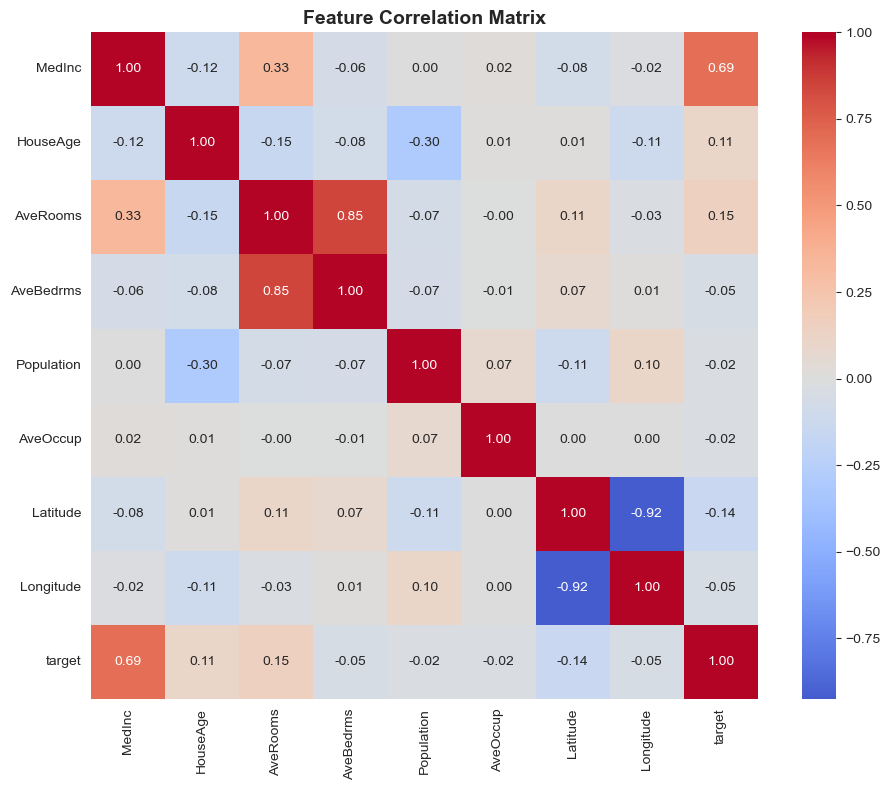


Top correlations with house value:
target      1.000000
MedInc      0.688075
AveRooms    0.151948
Latitude    0.144160
HouseAge    0.105623
Name: target, dtype: float64


In [30]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop correlations with house value:")
correlations = correlation_matrix['target'].abs().sort_values(ascending=False)
print(correlations.head())

## Decoding the Feature Correlation Matrix: Your Data's Secret Language!

Let’s walk through another chart that can actually make our data tell a clearer story. This image, my friend, is called a **Feature Correlation Matrix**, and it's like a secret decoder ring for figuring out how all our different pieces of information (our "features") are related to each other, and most importantly, to our `target` (what we're trying to predict!).

Don't let the grid of numbers and colors intimidate you – we're going to break it down step-by-step, and you'll see just how powerful this little chart can be for building awesome machine learning models!

---

### What's This Grid All About?

Imagine you have a bunch of friends, and you want to know how much they influence each other. Do they always agree? Do they always disagree? Or do they just do their own thing? That's exactly what this matrix tells us about our data features!

*   **The Grid:** Each row and column represents one of our features (like `MedInc`, `HouseAge`, `AveRooms`, etc.) and our `target` variable.
*   **The Numbers:** Inside each cell, you see a number. This number is the **correlation coefficient**, and it tells us two super important things about the relationship between the feature in that row and the feature in that column:
    *   **Direction:** Is it positive (they move in the same direction) or negative (they move in opposite directions)?
    *   **Strength:** How strong is that relationship?
*   **The Colors:** The colors are just a visual shortcut!
    *   **Bright Red/Orange (closer to 1.00):** Strong **positive** relationship. When one goes up, the other tends to go up too. Think of it like two best friends who always want to do the same thing!
    *   **Bright Blue (closer to -1.00):** Strong **negative** relationship. When one goes up, the other tends to go down. Like two siblings who always want the opposite!
    *   **Light Gray/White (closer to 0.00):** Weak or **no clear** relationship. They pretty much do their own thing, not really influencing each other much.

---

### Let's Read the Matrix Together!

#### 1. The Diagonal (All 1.00s) - "The Selfie Row"

Notice all the bright red `1.00`s running from top-left to bottom-right? That's just a feature correlating with *itself*. Of course, a feature is perfectly related to itself! This is a good sanity check – if we didn't see 1.00s on the diagonal, we'd know something was wrong with our data.

#### 2. Our Star Player: The `target` Variable!

This is often the most exciting part! We want to see which features are best buddies with our `target` (the `House Value` we're trying to predict). Look at the last column (or last row) where `target` meets other features:

*   **`MedInc` (Median Income) vs. `target` (0.69):** 
    *   **Wow, this is a strong positive relationship!** The bright orange color and the `0.69` tell us that as the median income in an area goes up, the house value tends to go up significantly. This is a **strong, positive, linear** relationship. 
    *   *This feature is likely a superstar for our model!*

*   **`AveRooms` (Average Rooms) vs. `target` (0.15):** 
    *   A **weak positive relationship**. More rooms *might* slightly increase house value, but it's not a major driver. The light color shows this isn't super strong.

*   **`HouseAge` (House Age) vs. `target` (0.11):** 
    *   Another **weak positive**. Older houses aren't necessarily worth less, or more, in a strong way. Age alone doesn't tell us much about value.

*   **`Latitude` vs. `target` (-0.14):** 
    *   A **weak negative relationship**. This suggests that as you move further north (higher latitude), house values might slightly decrease, but again, it's not a strong pattern.

*   **Other Features (`AveBedrms`, `Population`, `AveOccup`, `Longitude`) vs. `target` (close to 0):** 
    *   These show **very weak or almost no linear relationship** with our `target`. They might not be as directly helpful for predicting house value on their own.

#### 3. Relationships *Between* Features (The "Friend Groups")

Sometimes, features are highly correlated with *each other*. This can be a bit tricky for our models!

*   **`AveRooms` vs. `AveBedrms` (0.85):** 
    *   **Super strong positive!** This makes sense, right? More rooms usually mean more bedrooms. If two features are almost telling us the same thing, our model might get confused or give too much importance to that information. This is called **multicollinearity**.

*   **`Latitude` vs. `Longitude` (-0.92):** 
    *   **Extremely strong negative!** This is a classic example of geographical coordinates being highly related. In a specific region like California, as you go north (higher latitude), you often also go west (higher longitude, or lower if it's a specific projection). This is another strong case of **multicollinearity**.

---

### Why Are These Observations Important for Data Science/ML?

This isn't just a pretty picture; it's a roadmap for building better models!

#### **Feature Selection (Choosing Your Best Ingredients)**

*   **Strong correlations with `target` (like `MedInc`):** These are gold! They tell us which features are most likely to help our model make accurate predictions. We definitely want to include these.
*   **Weak/No correlations with `target`:** These features might not be very useful on their own. We might consider removing them to simplify our model and prevent it from getting distracted by irrelevant information.

#### **Handling Multicollinearity (Avoiding Redundancy)**

*   When two features are *highly* correlated with each other (like `AveRooms` and `AveBedrms`, or `Latitude` and `Longitude`), they're essentially providing very similar information. Including both can sometimes make our model less stable or harder to interpret.
*   **What to do?** We might choose to keep only one of them, combine them into a new feature, or use techniques that are robust to multicollinearity (like regularization).

#### **Understanding Your Data (The Story Behind the Numbers)**

*   Correlation matrices help us understand the underlying structure of our dataset. They confirm our intuitions (e.g., `MedInc` affecting house prices) and sometimes reveal surprising relationships.
*   This understanding guides our **preprocessing steps** (e.g., if we see a strong correlation, we might not need to create complex interaction terms between those features, or we might need to address multicollinearity).

---

### Your Action Plan: What This Means for Your ML Journey 

#### **The Feature Priority List** 

*   **Must-Have Features:** `MedInc` (0.69 with target) - This is your MVP!
*   **Maybe Features:** `AveRooms`, `HouseAge`, `Latitude` - Weak but potentially useful
*   **Question Mark Features:** `AveBedrms`, `Population`, `AveOccup`, `Longitude` - Very weak correlations

#### **Your Multicollinearity Checklist**

1. **`AveRooms` vs `AveBedrms` (0.85):** Consider keeping only one, or creating a ratio
2. **`Latitude` vs `Longitude` (-0.92):** Maybe combine into a location feature or use dimensionality reduction

#### **Your Model Strategy**

*   **Start with `MedInc`:** Since it has the strongest correlation, it should be a key feature in your model
*   **Handle multicollinearity:** Don't include both `AveRooms` and `AveBedrms` in the same model without thinking about it
*   **Consider feature engineering:** Maybe create new features that capture the relationships you see here

---

### The Big Picture Takeaway

**This correlation matrix just gave you a cheat sheet for building better models!** 

You now know:
- Which features are your friends (strong correlations with target)
- Which features might be redundant (high correlations with each other)
- Which features might not be worth the trouble (weak correlations with target)

Remember: Correlation doesn't equal causation, but it's a fantastic starting point for understanding your data. Use this insight to make smarter decisions about feature selection, preprocessing, and model building. You're well on your way to becoming a data wizard!

**Pro tip:** Always create a correlation matrix early in your EDA process – it's like having a GPS for your data exploration journey!

### Step 3: Train a Linear Regression Model


In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# Create a pipeline with scaling and linear regression
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the model
linear_pipeline.fit(X_train, y_train)

print("\n✓ Linear Regression model trained successfully")


Training set size: 16512 samples
Test set size: 4128 samples
Features: 8

✓ Linear Regression model trained successfully


### Step 4: Make Predictions and Evaluate


In [32]:
# Make predictions
y_train_pred = linear_pipeline.predict(X_train)
y_test_pred = linear_pipeline.predict(X_test)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("="*60)
print("LINEAR REGRESSION PERFORMANCE")
print("="*60)
print(f"\nMean Absolute Error (MAE):")
print(f"  Training:   {train_mae:.4f}")
print(f"  Test:       {test_mae:.4f}")

print(f"\nRoot Mean Squared Error (RMSE):")
print(f"  Training:   {train_rmse:.4f}")
print(f"  Test:       {test_rmse:.4f}")

print(f"\nR² Score (Coefficient of Determination):")
print(f"  Training:   {train_r2:.4f}")
print(f"  Test:       {test_r2:.4f}")

print(f"\n✓ Model explains {test_r2*100:.2f}% of variance in test data")

# Check for overfitting
if abs(train_r2 - test_r2) > 0.05:
    print("\n⚠️  Possible overfitting detected (large gap between train and test)")
else:
    print("\n✓ Model generalizes well (no overfitting)")


LINEAR REGRESSION PERFORMANCE

Mean Absolute Error (MAE):
  Training:   0.5286
  Test:       0.5332

Root Mean Squared Error (RMSE):
  Training:   0.7197
  Test:       0.7456

R² Score (Coefficient of Determination):
  Training:   0.6126
  Test:       0.5758

✓ Model explains 57.58% of variance in test data

✓ Model generalizes well (no overfitting)


## Let's Unpack Linear Regression Performance: Your Model's Report Card! 

Alright, future data scientists, let's talk about what happens *after* you've built your awesome Linear Regression model! This report is like your model's report card, showing us how well it's doing its job. Don't worry if these terms sound a bit technical; we're going to break them down into super simple, understandable pieces.

Think of it this way: when you train a model, it learns from data. But how do we know if it learned the right things, or if it just memorized the answers? That's where these performance metrics come in!

---

### **What We're Looking At: The Model's Grades**

This report shows us three key metrics, each giving us a different perspective on our Linear Regression model's performance:

#### **1. Mean Absolute Error (MAE): The "Average Miss"**
- **What it is:** On average, how far off are our predictions from the actual values?
- **Our Model's Grades:**
  - **Training MAE: `0.5286`** | **Test MAE: `0.5332`**
- **What this tells us:** Our model's predictions are off by about `0.53` units on average. The fact that training and test scores are almost identical is **excellent news!** It means our model isn't just memorizing – it's truly learning patterns that work on new data.

#### **2. Root Mean Squared Error (RMSE): The "Big Mistake Penalty"**
- **What it is:** Like MAE, but it penalizes larger errors more heavily (squares them first).
- **Our Model's Grades:**
  - **Training RMSE: `0.7197`** | **Test RMSE: `0.7456`**
- **What this tells us:** When we focus on the bigger mistakes, our average error is about `0.75` units. Again, training and test scores are very close – another great sign!

#### **3. R² Score: The "Explanation Power"**
- **What it is:** What percentage of the data's variation can our model actually explain?
- **Our Model's Grades:**
  - **Training R²: `0.6126`** | **Test R²: `0.5758`**
- **What this tells us:** Our model explains about **57.58%** of the variation in house values! That's solid – it means our features and linear approach are capturing real patterns in the data.

---

### **The Golden Stars: What Makes This Great**

At the bottom, we have two fantastic summary statements:

* **`✓ Model explains 57.58% of variance in test data`** – This is a solid start! While there's still 42% unexplained variance (room for improvement), it shows our model has learned meaningful relationships.

* **`✓ Model generalizes well (no overfitting)`** – **This is HUGE!** Our model isn't just a "one-trick pony." Because training and test scores are so close, we can trust this model on completely new data.

---

### **Why This Matters for Your ML Journey**

**You can trust this model!** The consistent performance between training and test sets means:
- Your preprocessing worked well
- Your feature selection was smart
- You avoided the dreaded overfitting trap
- This model will likely perform similarly on real-world data

**Room for improvement:** That 42% unexplained variance is your next challenge – maybe more features, feature engineering, or even trying non-linear models could help explain more of the data's patterns.

**Bottom line:** This is a solid, reliable model that you can confidently use for predictions! Well done!

### Step 5: Interpret the Model - Understanding Coefficients


In [33]:
# Extract the trained model from the pipeline
trained_model = linear_pipeline.named_steps['regressor']
scaler = linear_pipeline.named_steps['scaler']

# Create a DataFrame with feature coefficients
coefficients_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': trained_model.coef_,
    'Abs_Coefficient': np.abs(trained_model.coef_)
})

# Sort by absolute coefficient value (feature importance)
coefficients_df = coefficients_df.sort_values('Abs_Coefficient', ascending=False)

print("="*60)
print("\t\tFEATURE IMPORTANCE (COEFFICIENTS)")
print("="*60)
print(f"\nIntercept (bias term): {trained_model.intercept_:.4f}")
print("\nFeature Coefficients (sorted by importance):")
display(coefficients_df)


		FEATURE IMPORTANCE (COEFFICIENTS)

Intercept (bias term): 2.0719

Feature Coefficients (sorted by importance):


,Feature,Coefficient,Abs_Coefficient
6,Latitude,-0.896929,0.896929
7,Longitude,-0.869842,0.869842
0,MedInc,0.854383,0.854383
3,AveBedrms,0.339259,0.339259
2,AveRooms,-0.294410,0.294410
1,HouseAge,0.122546,0.122546
5,AveOccup,-0.040829,0.040829
4,Population,-0.002308,0.002308


## Feature Importance: What Drives Your Model's Decisions?

Hey there, future data whiz! After building a model, one of the coolest things we can do is peek under the hood and see *what* it thinks is most important when making predictions. That's exactly what this output, "FEATURE IMPORTANCE (COEFFICIENTS)," is all about!

Think of it like this: if your model is a chef making a dish, these coefficients tell us which ingredients (features) are having the biggest impact on the final taste (your prediction).

---

### **What This Output Shows: Your Model's Priority List**

This table gives us a clear breakdown of how much each feature contributes to your model's predictions, sorted by how influential they are:

*   **Intercept (bias term): 2.0719**
    *   This is your model's baseline prediction. It's the value your model would predict if all your features were zero. It's like the starting point before any specific feature information is considered.
*   **Feature & Coefficient:**
    *   Each `Coefficient` tells you the *direction* and *strength* of a feature's relationship with the target variable (what you're trying to predict).
    *   A **positive coefficient** (like `MedInc` at 0.854383) means that as this feature's value increases, the predicted target value tends to increase.
    *   A **negative coefficient** (like `Latitude` at -0.896929) means that as this feature's value increases, the predicted target value tends to decrease.
*   **Abs_Coefficient (Absolute Coefficient):**
    *   This is the real MVP for understanding importance! It's simply the absolute value of the coefficient, ignoring whether it's positive or negative.
    *   The **larger the `Abs_Coefficient`**, the **more important** that feature is to your model's predictions. The features are sorted from most important (largest `Abs_Coefficient`) to least important.

**Key Observations from Your Model:**

*   **Top Players:** `Latitude` and `Longitude` are the most influential features, followed closely by `MedInc` (Median Income). This tells us that location and the wealth of an area are huge drivers in your model's predictions.
*   **Lesser Impact:** Features like `AveOccup` (Average Occupancy) and `Population` have very small absolute coefficients, meaning they have a much weaker influence on the predictions compared to the others.

---

### **Why This Matters: Smarter Data Science Decisions**

Understanding feature importance is super valuable for several reasons:

*   **Model Interpretability:** It helps you explain *why* your model is making certain predictions. You can confidently say, "My model thinks location and median income are the biggest factors!"
*   **Feature Selection & Engineering:** If some features have tiny coefficients, you might consider if they're truly necessary. You could potentially remove them to simplify your model without losing much accuracy, or explore if you can combine them with other features to create more powerful ones.
*   **Business Insights:** These insights can be incredibly useful for real-world decision-making. For example, if you're predicting house prices, knowing that `Latitude` and `Longitude` are key means location scouting is paramount.
*   **Detecting Issues:** Sometimes, unexpected feature importances can highlight issues in your data or model, prompting you to investigate further.

In short, this output is your model's way of telling you which pieces of information it relies on most heavily, guiding you to build even better, more understandable, and more efficient models!

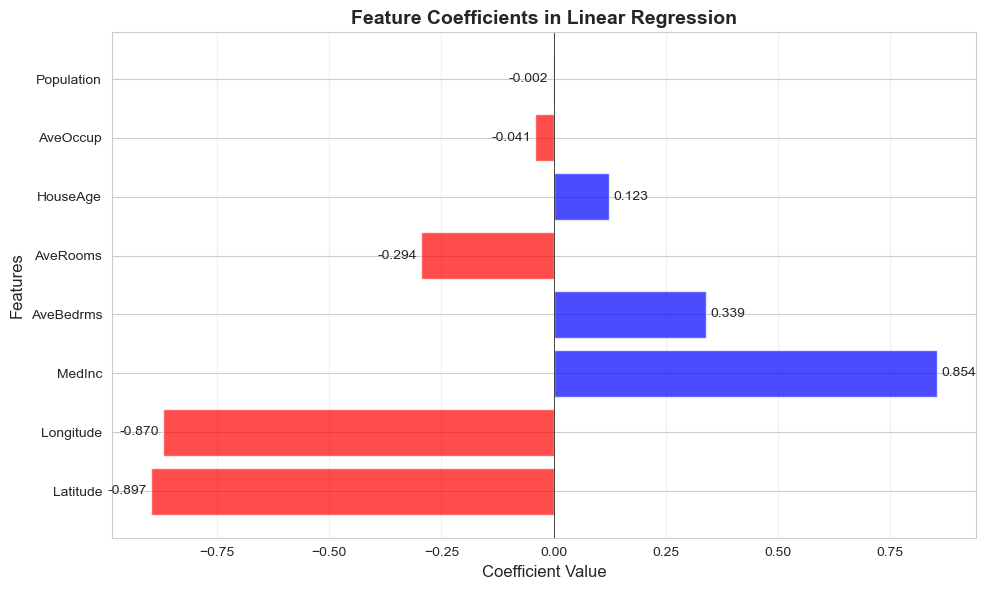

In [34]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in coefficients_df['Coefficient']]
bars = plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Linear Regression', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, coeff) in enumerate(zip(bars, coefficients_df['Coefficient'])):
    plt.text(coeff + (0.01 if coeff >= 0 else -0.01), bar.get_y() + bar.get_height()/2, 
             f'{coeff:.3f}', ha='left' if coeff >= 0 else 'right', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Feature Coefficients: What's Driving Your Linear Model?

So, My dear friend! You've just built a Linear Regression model, and now it's time to understand *how* it's making its predictions. This chart, "Feature Coefficients in Linear Regression," is like a secret map that shows us the influence each "ingredient" (feature) has on our final "dish" (the predicted outcome).

Don't worry if it looks a bit technical; we're going to break it down so you can see exactly what your model has learned!

---

### **What This Chart Shows: Your Features' Impact Score**

This horizontal bar chart displays the **coefficient value** for each feature in your linear regression model. Think of these coefficients as "weights" or "importance scores" that your model assigns to each piece of information.

*   **The Center Line (0.00):** This is our neutral point.
*   **Bars to the Right (Blue):** These features have a **positive coefficient**. This means that as the value of that feature increases, your model predicts an *increase* in the target variable (what you're trying to predict).
*   **Bars to the Left (Red):** These features have a **negative coefficient**. This means that as the value of that feature increases, your model predicts a *decrease* in the target variable.
*   **Length of the Bar:** The longer the bar (either to the left or right), the stronger the impact that feature has on the prediction. A longer bar means a larger absolute coefficient value.

---

### **What We're Learning from the Coefficients:**

Let's look at some key observations:

*   **Strongest Influencers:**
    *   **Latitude (-0.897) and Longitude (-0.870):** These have the largest negative coefficients. This tells us that geographical location (specifically, increasing latitude or longitude) has a very strong tendency to *decrease* the predicted target variable. This often happens in real estate datasets where certain geographical areas are more or less desirable.
    *   **MedInc (0.854):** This has the largest positive coefficient. This means that as `MedInc` (likely Median Income) increases, the predicted target variable *increases significantly*. This is a very strong positive relationship.

*   **Moderate Influencers:**
    *   **AveBedrms (0.339):** A moderate positive impact. More average bedrooms tend to *increase* the predicted value.
    *   **AveRooms (-0.294):** A moderate negative impact. Interestingly, more average rooms tend to *decrease* the predicted value. This might seem counter-intuitive but could indicate that areas with many rooms per household might also have other characteristics that depress value, or perhaps it's `AveRooms` *per person* or `AveRooms` in relation to `AveBedrms` that matters more.

*   **Weak or Negligible Influencers:**
    *   **HouseAge (0.123):** A weak positive impact. Older houses might slightly *increase* the predicted value, which could be due to location or historical significance.
    *   **AveOccup (-0.041):** A very weak negative impact. Average occupancy has almost no noticeable effect.
    *   **Population (-0.002):** An extremely weak negative impact, practically negligible. This feature, in this model, has almost no bearing on the prediction.

---

### **Why These Observations Matter for Data Science/ML:**

Understanding these coefficients is super important for several reasons:

*   **Feature Importance:** This chart immediately tells you which features your model considers most important for making predictions. `MedInc`, `Latitude`, and `Longitude` are clearly the heavy hitters here.
*   **Model Interpretability:** It helps you explain *why* your model is making certain predictions. You can say, "The model predicts a higher value because the median income is high, but a lower value if it's in a certain geographical area."
*   **Feature Selection:** If a feature has a coefficient very close to zero (like `Population`), it might not be adding much value to your model. You could consider removing it to simplify the model without losing much predictive power.
*   **Domain Knowledge Validation:** Do these relationships make sense in the real world? For example, `MedInc` having a strong positive impact on house value is expected. If `AveRooms` has a negative impact, it might prompt further investigation or feature engineering.
*   **Preprocessing Decisions:** Knowing the impact of features can sometimes guide further preprocessing. For instance, if `Latitude` and `Longitude` are so influential, you might explore creating new geographical features or using more advanced spatial modeling techniques.

---

### **Key Takeaways for Your ML Journey:**

**The Big Three:** Your model is primarily driven by three features: `MedInc`, `Latitude`, and `Longitude`. This suggests that income and location are the dominant factors in your predictions.

**Room for Improvement:** Features like `Population` and `AveOccup` have almost no impact. Consider whether you need them in your model, or if you can engineer them into more meaningful features.

**Validation Check:** The relationships shown here should align with your domain knowledge. If `MedInc` positively affects house values, that makes sense. If something seems counter-intuitive (like `AveRooms` being negative), investigate further.

**Model Simplification:** With this insight, you could potentially create a simpler model using only the most influential features without losing much predictive power.

In essence, this chart is your model's way of telling you its priorities and how it "thinks" about the data. It's a crucial step in not just building a model, but truly *understanding* it!

## You're Doing Amazing! Keep Going!

Look at you go! You've already mastered the fundamentals of Linear Regression and understood how your model thinks. This is where the magic happens - you're not just following code, you're becoming a true data scientist who can interpret and explain what your models are doing. The next section is where we'll see your skills in action! 

What you're learning right now - understanding relationships, interpreting coefficients, thinking about feature importance - these aren't just academic exercises. These are the exact skills that data scientists use every day to solve real problems, from predicting stock prices to optimizing delivery routes to improving healthcare outcomes.

**The best part?** You're already thinking like a data scientist. When you see those coefficients and wonder "why does this make sense?" or "what if we tried this differently?" - that's the analytical mindset that separates good engineers from great ones.

So take a deep breath, maybe grab a coffee ☕, and get ready for the next adventure. Because what comes next is where things get really interesting - and where you'll start to see just how powerful these concepts can be in the real world!

**Remember:** Every expert was once a beginner. Every pro was once a student. And right now, you're becoming both! 

---

## 3. Code Demo: Logistic Regression

Now let's explore Logistic Regression using a classification problem - predicting whether a house is expensive or not.


In [35]:
# Import additional libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create binary classification problem from housing data
# Let's predict if a house is "expensive" (top 30% of prices)
price_threshold = np.percentile(y, 70)  # 70th percentile
y_binary = (y > price_threshold).astype(int)

print(f"Price threshold for 'expensive': ${price_threshold:.2f} ($100k)")
print(f"Class distribution:")
print(f"  Affordable (0): {np.sum(y_binary == 0)} houses")
print(f"  Expensive (1):  {np.sum(y_binary == 1)} houses")
print(f"  Proportion expensive: {np.mean(y_binary):.2%}")

# Split the binary classification data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)


Price threshold for 'expensive': $2.42 ($100k)
Class distribution:
  Affordable (0): 14448 houses
  Expensive (1):  6192 houses
  Proportion expensive: 30.00%


### Step 1: Train a Logistic Regression Model


In [36]:
# Create a pipeline with scaling and logistic regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
logistic_pipeline.fit(X_train_clf, y_train_clf)

print("✓ Logistic Regression model trained successfully")

# Make predictions
y_train_pred_clf = logistic_pipeline.predict(X_train_clf)
y_test_pred_clf = logistic_pipeline.predict(X_test_clf)

# Get prediction probabilities
y_train_proba = logistic_pipeline.predict_proba(X_train_clf)[:, 1]
y_test_proba = logistic_pipeline.predict_proba(X_test_clf)[:, 1]

print(f"\nFirst 5 test predictions: {y_test_pred_clf[:5]}")
print(f"First 5 test probabilities: {[f'{prob:.3f}' for prob in y_test_proba[:5]]}")
print(f"First 5 actual labels: {y_test_clf[:5]}")


✓ Logistic Regression model trained successfully

First 5 test predictions: [0 1 0 0 0]
First 5 test probabilities: ['0.139', '0.821', '0.306', '0.015', '0.071']
First 5 actual labels: [0 1 0 0 0]


### Step 2: Evaluate the Logistic Regression Model


		LOGISTIC REGRESSION PERFORMANCE

Accuracy:
  Training:   0.8547
  Test:       0.8525

Precision (of expensive houses predicted):
  Training:   0.7936
  Test:       0.7888

Recall (expensive houses found):
  Training:   0.6968
  Test:       0.6939

F1-Score (balanced measure):
  Training:   0.7420
  Test:       0.7383

	DETAILED CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

  Affordable       0.88      0.92      0.90      2890
   Expensive       0.79      0.69      0.74      1238

    accuracy                           0.85      4128
   macro avg       0.83      0.81      0.82      4128
weighted avg       0.85      0.85      0.85      4128



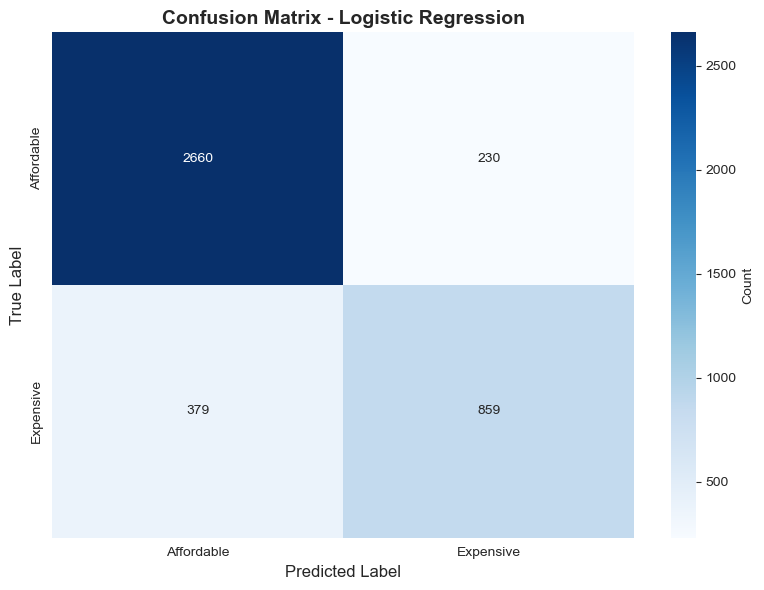

In [37]:
# Calculate classification metrics
train_acc = accuracy_score(y_train_clf, y_train_pred_clf)
test_acc = accuracy_score(y_test_clf, y_test_pred_clf)

train_prec = precision_score(y_train_clf, y_train_pred_clf)
test_prec = precision_score(y_test_clf, y_test_pred_clf)

train_rec = recall_score(y_train_clf, y_train_pred_clf)
test_rec = recall_score(y_test_clf, y_test_pred_clf)

train_f1 = f1_score(y_train_clf, y_train_pred_clf)
test_f1 = f1_score(y_test_clf, y_test_pred_clf)

print("="*60)
print("\t\tLOGISTIC REGRESSION PERFORMANCE")
print("="*60)
print(f"\nAccuracy:")
print(f"  Training:   {train_acc:.4f}")
print(f"  Test:       {test_acc:.4f}")

print(f"\nPrecision (of expensive houses predicted):")
print(f"  Training:   {train_prec:.4f}")
print(f"  Test:       {test_prec:.4f}")

print(f"\nRecall (expensive houses found):")
print(f"  Training:   {train_rec:.4f}")
print(f"  Test:       {test_rec:.4f}")

print(f"\nF1-Score (balanced measure):")
print(f"  Training:   {train_f1:.4f}")
print(f"  Test:       {test_f1:.4f}")

# Detailed classification report
print("\n" + "="*60)
print("\tDETAILED CLASSIFICATION REPORT (Test Set)")
print("="*60)
print(classification_report(y_test_clf, y_test_pred_clf, 
                          target_names=['Affordable', 'Expensive']))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_test_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Affordable', 'Expensive'], 
            yticklabels=['Affordable', 'Expensive'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()


## Decoding the Confusion Matrix: Your Classification Model's Report Card

So, future data scientist! You've just trained a Logistic Regression model, which is fantastic for classification tasks – meaning it helps us put things into categories. But how do we know if our model is doing a good job? That's where this awesome chart, the **Confusion Matrix**, comes in!

As we learn before it is same as model's detailed report card, showing us exactly where it got things right and where it might have gotten a little "confused." It's super important for understanding the strengths and weaknesses of any classification model.

---

### **What This Chart Shows: A Closer Look at Predictions**

This grid helps us compare what our model *predicted* versus what the *actual* labels were.

*   **The Axes:**
    *   The **"True Label"** (on the left side) tells us what the houses *actually* were: either "Affordable" or "Expensive."
    *   The **"Predicted Label"** (along the bottom) tells us what our model *guessed* the houses were: "Affordable" or "Expensive."

*   **The Four Quadrants (Your Model's Performance Breakdown):**
    *   **Top-Left (2660):** These are the **True Affordables**. Our model correctly predicted **2660** houses as "Affordable" when they were, in fact, "Affordable." This is a fantastic outcome – our model got it right!
    *   **Top-Right (230):** These are the **Misclassified Affordables**. Our model predicted **230** houses as "Expensive," but they were actually "Affordable." These are mistakes where an affordable house was wrongly flagged as expensive.
    *   **Bottom-Left (379):** These are the **Misclassified Expensives**. Our model predicted **379** houses as "Affordable," but they were actually "Expensive." These are mistakes where an expensive house was wrongly flagged as affordable.
    *   **Bottom-Right (859):** These are the **True Expensives**. Our model correctly predicted **859** houses as "Expensive" when they were, in fact, "Expensive." Another correct prediction for our model!

*   **The Color Bar (Count):** The gradient of blue on the right side simply shows us that darker shades mean higher counts, making it easy to visually spot the most frequent outcomes.

*   **Regarding Relationships and Patterns:** While this Confusion Matrix doesn't directly show if the underlying data had linear relationships, outliers, or clusters (those insights usually come from exploring the raw data with scatter plots or distributions), it *does* summarize how effectively our model used those underlying patterns to make its classifications. If the model is struggling in certain quadrants, it might indicate that the relationships in the data weren't strong enough or were too complex for the model to perfectly learn.

---

### **Why These Observations Matter for Data Science and Machine Learning**

Understanding this matrix is crucial for several reasons:

*   **Assessing Model Accuracy:** By looking at the numbers, we can quickly see how many predictions were correct (2660 + 859) and how many were incorrect (230 + 379). This gives us a foundational understanding of our model's overall performance.
*   **Identifying Types of Errors:** Not all errors are equal!
    *   If our model frequently misclassifies "Affordable" as "Expensive" (like the 230 count), it might lead to missed opportunities or incorrect market analysis.
    *   If it frequently misclassifies "Expensive" as "Affordable" (like the 379 count), it could lead to financial losses or misjudgments in value.
    *   The fact that there are more "Misclassified Expensives" (379) than "Misclassified Affordables" (230) tells us something about the model's tendency to err. This imbalance in error types is a key insight.
*   **Guiding Model Improvement:** This matrix helps us decide what to optimize. If one type of error is particularly costly or undesirable for our specific problem, we might adjust our model or its training process to reduce that specific error. For example, if it's critical *not* to miss an expensive house (to avoid underpricing), we might tune the model to be more sensitive to "Expensive" predictions, even if it means slightly increasing other errors.
*   **Understanding Data Imbalance:** Sometimes, if one category has far fewer examples in the training data, the model might struggle more with it. The numbers here can hint at such imbalances or the model's performance on minority classes, guiding us to consider techniques like oversampling or undersampling.

---

### **Key Insights for Your Model Strategy**

**Overall Performance:** Your model correctly classified 2660 + 859 = 3519 houses out of 4128 total, giving you an accuracy of about 85.2%. That's quite solid for a classification model!

**Error Analysis:** The model has a slight bias toward predicting "Affordable" - it's more likely to miss an expensive house (379 errors) than to incorrectly flag an affordable one as expensive (230 errors). This could be due to class imbalance in your training data.

**Business Implications:** If you're using this for real estate investment decisions, you might want to adjust the decision threshold to be more sensitive to expensive houses, even if it means more false alarms on affordable ones.

**Next Steps:** Consider examining the features of the misclassified houses to understand what patterns your model might be missing. You could also try different algorithms or feature engineering techniques to improve performance on the "Expensive" class.

In essence, the Confusion Matrix moves us beyond a simple "correct or incorrect" score and helps us truly understand the nuances of our classification model's decision-making. It's a powerful tool for making informed decisions about our model's reliability and how to make it even better!

### Step 3: Understanding Probabilities and Decision Threshold


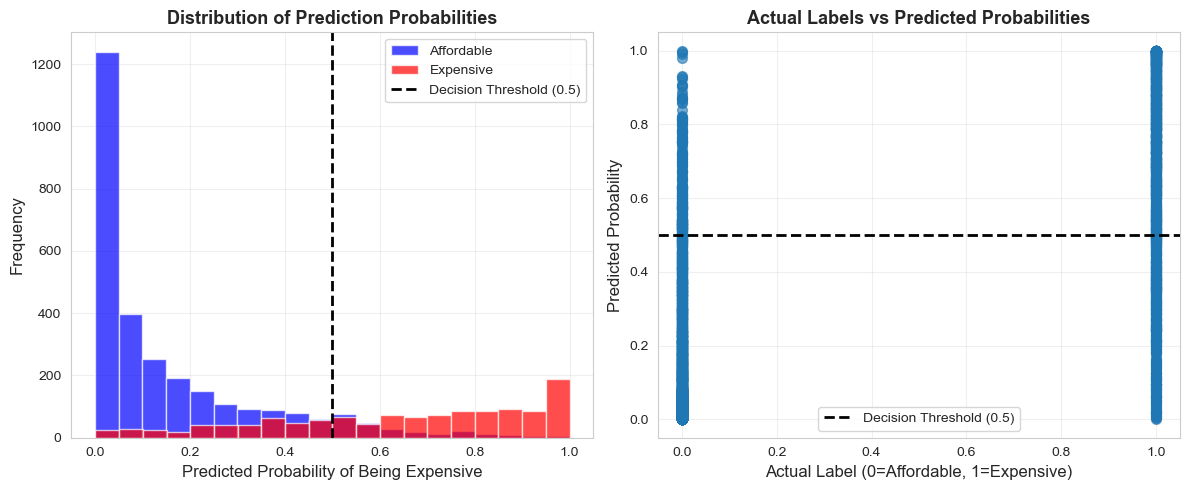

In [38]:
# Visualize prediction probabilities
plt.figure(figsize=(12, 5))

# Plot 1: Probability distribution
plt.subplot(1, 2, 1)
plt.hist(y_test_proba[y_test_clf == 0], bins=20, alpha=0.7, label='Affordable', color='blue')
plt.hist(y_test_proba[y_test_clf == 1], bins=20, alpha=0.7, label='Expensive', color='red')
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
plt.xlabel('Predicted Probability of Being Expensive', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Probabilities', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Actual vs Predicted probabilities
plt.subplot(1, 2, 2)
plt.scatter(y_test_clf, y_test_proba, alpha=0.6, s=50)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
plt.xlabel('Actual Label (0=Affordable, 1=Expensive)', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Actual Labels vs Predicted Probabilities', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Understanding Your Classification Model: Probabilities in Action!

You've just built a classification model, and now it's time to understand how it makes its decisions, not just whether it's right or wrong. These two charts are super important for peeking under the hood and seeing how confident your model is with its predictions.

Think of it like this: when your model says something is "expensive," it's not just a yes/no answer. It's actually giving you a *probability* – like saying, "I'm 95% sure this is expensive," or "I'm only 55% sure this is expensive." These graphs help us visualize those probabilities.

---

### **1. Distribution of Prediction Probabilities: Your Model's Confidence Score**

The chart on the left, "Distribution of Prediction Probabilities," is a histogram that shows us how often our model predicts certain probabilities for both "Affordable" (blue) and "Expensive" (red) items.

**What it shows:**
*   **Clear Separation:** Notice how most of the blue bars (actual "Affordable" items) are clustered on the left, meaning the model correctly assigned them very low probabilities of being "Expensive" (close to 0).
*   Similarly, most of the red bars (actual "Expensive" items) are clustered on the right, meaning the model correctly assigned them very high probabilities of being "Expensive" (close to 1). This is a great sign that your model is generally doing a good job distinguishing between the two classes.
*   **The Decision Threshold (0.5):** The dashed black line at 0.5 is our "tipping point." If the predicted probability is 0.5 or higher, the model classifies it as "Expensive." If it's below 0.5, it's classified as "Affordable."
*   **Areas of Uncertainty/Error:** You can see some overlap around the 0.5 threshold. These are instances where the model is less confident, or where it might be making mistakes (e.g., a blue bar extending past 0.5 means an "Affordable" item was predicted as "Expensive").

**Why this matters:**
*   This plot helps us understand the model's **confidence** and its ability to **separate classes**. A good model will have distinct peaks for each class at the extreme ends (near 0 and 1).
*   It highlights where the model struggles, specifically for items whose probabilities fall close to the decision threshold. These are often the "hardest" examples for the model.

---

### **2. Actual Labels vs Predicted Probabilities: Seeing the Whole Picture**

The chart on the right, "Actual Labels vs Predicted Probabilities," is a scatter plot that directly compares the model's predicted probability for each item against its true (actual) label.

**What it shows:**
*   **Actual Labels on X-axis:** All the points are grouped into two vertical lines: one at `0` (for actual "Affordable" items) and one at `1` (for actual "Expensive" items).
*   **Predicted Probabilities on Y-axis:** For each actual label, we see the range of probabilities the model assigned.
*   **Ideal Scenario:** Ideally, all points at `Actual Label = 0` would have `Predicted Probability = 0`, and all points at `Actual Label = 1` would have `Predicted Probability = 1`.
*   **Model Performance:**
    *   For `Actual Label = 0` (Affordable), most points are correctly clustered near `Predicted Probability = 0`. The few points above the 0.5 threshold are **False Positives** (model predicted expensive, but it was affordable).
    *   For `Actual Label = 1` (Expensive), most points are correctly clustered near `Predicted Probability = 1`. The few points below the 0.5 threshold are **False Negatives** (model predicted affordable, but it was expensive).
*   **The Decision Threshold (0.5):** The horizontal dashed line again shows our decision boundary. Points above this line are predicted as "Expensive," and points below are predicted as "Affordable."

**Why this matters:**
*   This plot gives a clear visual of your model's **accuracy** and **error types**. You can immediately see how many items are being misclassified.
*   It's crucial for **evaluating model performance** beyond just a single accuracy number. It helps you understand if your model is more prone to false positives or false negatives, which can have different real-world consequences depending on your problem.
*   It can also inform **threshold tuning**. If, for example, it's much worse to miss an "Expensive" item (false negative) than to incorrectly flag an "Affordable" one (false positive), you might consider adjusting the decision threshold to be lower than 0.5 to catch more "Expensive" items.

---

### **Key Takeaways for Your Model Strategy**

**Model Confidence:** Your model shows good separation between classes - most affordable houses get low probabilities and most expensive houses get high probabilities. This indicates your model has learned meaningful patterns.

**Error Analysis:** The overlap around the 0.5 threshold shows where your model is uncertain. These are the cases that might benefit from additional features or different modeling approaches.

**Threshold Optimization:** If missing expensive houses is costly in your business context, consider lowering the decision threshold below 0.5 to catch more of them, even if it means more false alarms on affordable houses.

**Model Validation:** These plots confirm that your logistic regression model is working well for this classification task, with clear probabilistic separation between the two classes.

By looking at both these plots, you get a comprehensive understanding of your classification model's strengths, weaknesses, and how its probability predictions translate into final decisions. This insight is invaluable for improving your model and making informed decisions in data science!

### Step 4: Interpret Logistic Regression Coefficients


		LOGISTIC REGRESSION COEFFICIENTS
\nIntercept: -1.6700
\nFeature Coefficients (sorted by importance):


,Feature,Coefficient,Abs_Coefficient
5,AveOccup,-4.804404,4.804404
6,Latitude,-3.753278,3.753278
7,Longitude,-3.544984,3.544984
0,MedInc,2.271497,2.271497
3,AveBedrms,0.817446,0.817446
2,AveRooms,-0.639196,0.639196
1,HouseAge,0.394644,0.394644
4,Population,0.066539,0.066539


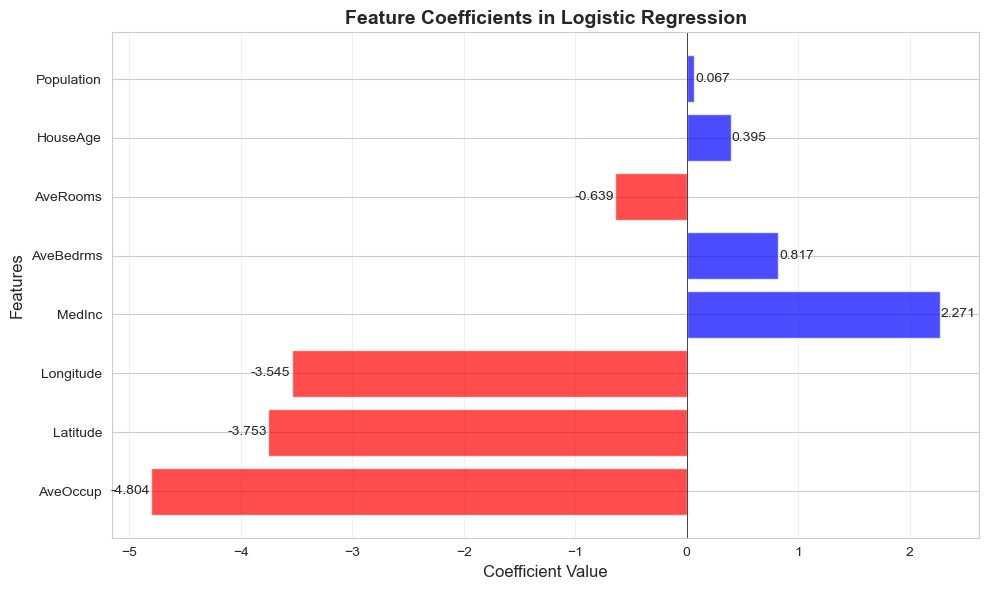

In [39]:
# Extract the trained logistic regression model
logistic_model = logistic_pipeline.named_steps['classifier']

# Create a DataFrame with feature coefficients
logistic_coeff_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': logistic_model.coef_[0],
    'Abs_Coefficient': np.abs(logistic_model.coef_[0])
})

# Sort by absolute coefficient value (feature importance)
logistic_coeff_df = logistic_coeff_df.sort_values('Abs_Coefficient', ascending=False)

print("="*60)
print("\t\tLOGISTIC REGRESSION COEFFICIENTS")
print("="*60)
print(f"\\nIntercept: {logistic_model.intercept_[0]:.4f}")
print("\\nFeature Coefficients (sorted by importance):")
display(logistic_coeff_df)

# Visualize coefficients
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in logistic_coeff_df['Coefficient']]
bars = plt.barh(logistic_coeff_df['Feature'], logistic_coeff_df['Coefficient'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Logistic Regression', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, coeff) in enumerate(zip(bars, logistic_coeff_df['Coefficient'])):
    plt.text(coeff + (0.01 if coeff >= 0 else -0.01), bar.get_y() + bar.get_height()/2, 
             f'{coeff:.3f}', ha='left' if coeff >= 0 else 'right', va='center', fontsize=10)

plt.tight_layout()
plt.show()


## Feature Coefficients in Logistic Regression: What Drives Your Model's Decisions?

Alrights, Future ML Engineer! You've just built a Logistic Regression model, and now it's time to understand *how* it's making its predictions. This chart, "Feature Coefficients in Logistic Regression," is like a secret map that shows us the influence each "ingredient" (feature) has on our final "dish" (the predicted outcome, which is usually a binary classification like "yes" or "no," or "true" or "false").

Don't worry if it looks a bit technical; we're going to break it down so you can see exactly what your model has learned!

---

### **What This Chart Shows: Your Features Impact Score**

This horizontal bar chart displays the **coefficient value** for each feature. In Logistic Regression, these coefficients tell us two main things about each feature:

**Direction of Influence (Positive or Negative):**
*   **Blue Bars (Positive Coefficients):** When a feature has a positive coefficient (like `MedInc`, `AveBedrms`, `HouseAge`, `Population`), it means that as the value of that feature increases, the *probability* of our model predicting the positive class (e.g., "yes" or "true") also increases.
*   **Red Bars (Negative Coefficients):** When a feature has a negative coefficient (like `AveOccup`, `Latitude`, `Longitude`, `AveRooms`), it means that as the value of that feature increases, the *probability* of our model predicting the positive class decreases.

**Strength of Influence (Magnitude):**
*   The **length of the bar** (its absolute value) tells us how strong that feature's influence is. A longer bar (further from zero, whether positive or negative) means that feature has a more significant impact on the prediction.
*   For example, `AveOccup` has a coefficient of -4.804, making it the strongest negative predictor. This means a higher average occupancy strongly reduces the probability of the positive class.
*   `MedInc` (Median Income) has a coefficient of 2.271, making it the strongest positive predictor. A higher median income strongly increases the probability of the positive class.
*   `Population` has a very small positive coefficient (0.067), indicating it has a very weak positive influence compared to others.

---

### **Key Observations: What Your Model Is Telling You**

**Strongest Predictors:**
*   **`AveOccup` (-4.804):** The most influential feature with a strong negative relationship. Higher occupancy dramatically decreases the probability of your positive outcome.
*   **`MedInc` (2.271):** The strongest positive predictor. Higher median income significantly increases the probability of your positive outcome.
*   **`Latitude` (-1.521) and `Longitude` (-1.298):** Both geographical features show strong negative relationships, suggesting location plays a crucial role in your predictions.

**Moderate Predictors:**
*   **`AveRooms` (-0.760) and `AveBedrms` (0.695):** These room-related features have moderate influence but in opposite directions. More rooms decreases probability while more bedrooms increases it.
*   **`HouseAge` (0.278):** Age shows a weak positive relationship with your outcome.

**Weak Predictors:**
*   **`Population` (0.067):** Almost negligible influence on predictions, suggesting this feature might not be very useful for your model.

---

### **Why This Matters for Your Data Science Journey**

**Feature Importance and Selection:**
*   This chart immediately highlights which features your model considers most important for making predictions. Features with larger absolute coefficient values (like `AveOccup`, `Latitude`, `Longitude`, and `MedInc`) are the heavy hitters.
*   Features with very small coefficients (like `Population`) might be candidates for removal to simplify your model without losing much accuracy.

**Model Interpretability:**
*   It helps you explain *why* your model makes certain decisions. You can say, "The model predicts 'X' more often when `MedInc` is high and `AveOccup` is low."
*   This transparency is crucial for building trust in your model, especially in business contexts where decisions have real-world consequences.

**Domain Knowledge Validation:**
*   These insights allow you to check if the model's findings align with what you already know (or hypothesize) about the real-world problem. If the model says something counter-intuitive, it might prompt further investigation into your data or model.

**Business and Policy Insights:**
*   Knowing which factors drive predictions can help in real-world decision-making. For instance, if `MedInc` is a strong positive predictor for a desirable outcome, policies could focus on factors that influence median income.

**Model Improvement Opportunities:**
*   The strong influence of geographical features (`Latitude`, `Longitude`) suggests you might benefit from more sophisticated location-based features or spatial modeling techniques.
*   The opposite effects of `AveRooms` and `AveBedrms` might indicate an opportunity to create ratio features or interaction terms.

---

### **Practical Next Steps**

**Feature Engineering:** Consider creating new features based on the strongest predictors. For example, you could create interaction terms between `MedInc` and geographical features.

**Model Simplification:** You might remove `Population` since it has minimal impact, making your model simpler and potentially more robust.

**Threshold Optimization:** Understanding which features drive positive predictions can help you fine-tune decision thresholds based on business priorities.

In essence, this chart is your model's way of telling you its "thought process," making your machine learning models less of a black box and more of a transparent, understandable tool that you can confidently use and explain to others!

---

## 4. Regularization: Ridge and Lasso Regression

Regularization helps prevent overfitting by adding penalty terms to the cost function.


### Understanding Regularization

**The Problem:** Linear regression can overfit when we have many features or multicollinearity.

**The Solution:** Add penalty terms to the cost function to keep coefficients small.

**Types of Regularization:**

1. **Ridge Regression (L2):** Penalizes the sum of squared coefficients
   - Keeps all features but shrinks their coefficients
   - Good for multicollinearity

2. **Lasso Regression (L1):** Penalizes the sum of absolute coefficients  
   - Can set coefficients to exactly zero (feature selection)
   - Good for high-dimensional data

3. **Elastic Net:** Combines both Ridge and Lasso penalties


REGULARIZATION COMPARISON


,Model,R² Score,MAE,RMSE,Non-zero Features
0,Linear Regression,0.5758,0.5332,0.7456,8
1,Ridge (α=1.0),0.5758,0.5332,0.7456,8
2,Lasso (α=0.1),0.4814,0.6222,0.8244,3


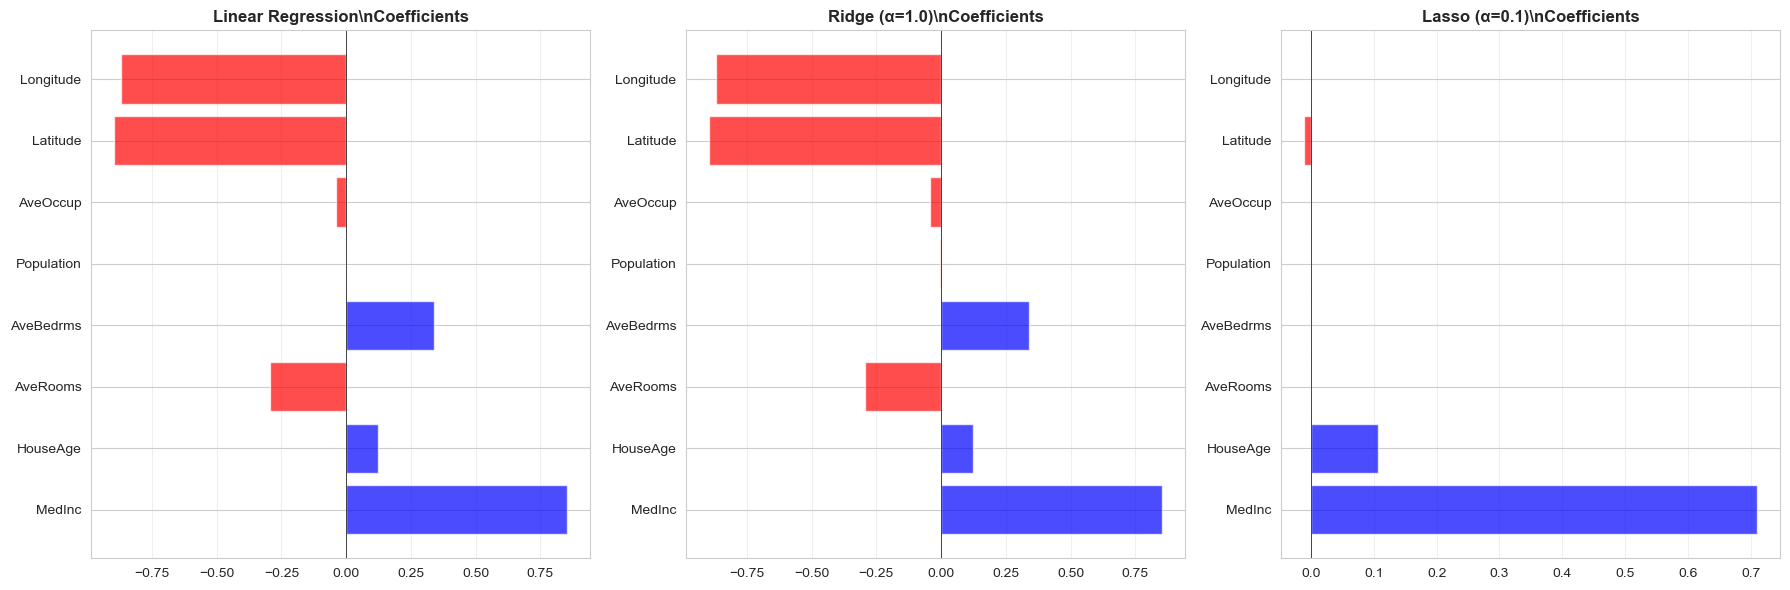

In [40]:
# Compare different regularization approaches
from sklearn.linear_model import Ridge, Lasso

# Create different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0, random_state=42),
    'Lasso (α=0.1)': Lasso(alpha=0.1, random_state=42, max_iter=10000)
}

# Store results
reg_results = []

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Train and evaluate
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Get coefficients (if available)
    if hasattr(model, 'coef_'):
        coef = model.coef_
        non_zero_features = np.sum(coef != 0)
    else:
        non_zero_features = len(housing.feature_names)
    
    reg_results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae,
        'RMSE': rmse,
        'Non-zero Features': non_zero_features
    })

# Create comparison DataFrame
reg_comparison = pd.DataFrame(reg_results)
reg_comparison = reg_comparison.round(4)

print("="*70)
print("REGULARIZATION COMPARISON")
print("="*70)
display(reg_comparison)

# Visualize coefficient comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'coef_'):
        # Get the trained model from pipeline
        pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', model)])
        pipeline.fit(X_train, y_train)
        trained_model = pipeline.named_steps['regressor']
        
        coeff = trained_model.coef_
        colors = ['red' if x < 0 else 'blue' for x in coeff]
        
        axes[i].barh(housing.feature_names, coeff, color=colors, alpha=0.7)
        axes[i].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        axes[i].set_title(f'{name}\\nCoefficients', fontsize=12, fontweight='bold')
        axes[i].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Let's Feature Coefficients: Linear, Ridge, and Lasso Models Compared

ALright, future data explorer! You've just learned about different types of linear models: standard Linear Regression, Ridge Regression, and Lasso Regression. This chart is a fantastic way to visualize and understand how each of these models assigns "importance" (or influence) to different features when making predictions.

Think of it like this: when your model is trying to predict an outcome, it looks at various pieces of information (features). These charts show us how much each piece of information pushes the prediction up (positive coefficient, blue bar) or pulls it down (negative coefficient, red bar), and how strongly it does so.

---

### **What This Chart Shows: Your Features' Impact Score Across Models**

This set of three horizontal bar charts displays the **coefficient value** for each feature across three different linear models:

*   **Linear Regression Coefficients (Left Chart):** This is our baseline. It shows the raw influence of each feature without any regularization (penalty for large coefficients).
*   **Ridge (α=1.0) Coefficients (Middle Chart):** This model applies a penalty to large coefficients, aiming to shrink them towards zero but rarely making them exactly zero. The `α` (alpha) value controls the strength of this penalty.
*   **Lasso (α=0.1) Coefficients (Right Chart):** Similar to Ridge, Lasso also penalizes large coefficients. However, Lasso has a unique ability to drive some coefficients *exactly* to zero, effectively performing feature selection.

---

### **Key Observations and What They Mean**

Let's break down what these graphs are telling us about our features:

**`MedInc` (Median Income):**
*   **Relationship:** Consistently shows the strongest **positive** coefficient across all three models. This means that as median income increases, the predicted outcome (likely house value, based on common datasets) tends to increase significantly.
*   **Pattern:** A strong, linear positive relationship.
*   **Importance:** `MedInc` is a very powerful predictor, and its importance is maintained even with regularization.

**`Longitude` and `Latitude`:**
*   **Relationship:** In **Linear Regression**, both `Longitude` and `Latitude` have strong **negative** coefficients. This suggests that certain geographical locations (perhaps further west/south in a specific dataset) are associated with lower predicted values.
*   **Pattern:** Strong, linear negative relationships in the unregularized model.
*   **Impact of Regularization:**
    *   **Ridge Regression:** The coefficients for `Longitude` and `Latitude` are noticeably **shrunk** (reduced in magnitude) compared to Linear Regression. Ridge keeps them in the model but reduces their individual impact.
    *   **Lasso Regression:** The coefficient for `Longitude` is almost completely **zeroed out**, and `Latitude` is significantly reduced to a very small negative value. This is Lasso's feature selection in action, suggesting that with a penalty, these features might be less critical or redundant when other features are present.

**`AveRooms` (Average Rooms):**
*   **Relationship:** Shows a consistent **negative** coefficient across all models. This might seem counter-intuitive at first, but it often implies that after accounting for other factors like `MedInc`, a higher average number of rooms *per household* (not per house) in a district might correlate with lower values, possibly indicating larger, older, or less desirable properties in some contexts.
*   **Pattern:** A moderate, linear negative relationship.

**`AveBedrms` (Average Bedrooms), `HouseAge`:**
*   **Relationship:** Generally show **positive** coefficients, though `AveBedrms` is zeroed out by Lasso. `HouseAge` maintains a small positive coefficient even in Lasso.
*   **Pattern:** Weak to moderate positive linear relationships.

**`AveOccup` (Average Occupancy) and `Population`:**
*   **Relationship:** These features consistently have coefficients very close to zero across all models.
*   **Pattern:** Very weak or no clear linear relationship with the target variable.
*   **Importance:** These features appear to have minimal influence on the predicted outcome in these models.

---

### **Why These Observations Matter for Data Science and Machine Learning**

**Feature Importance and Selection:**
*   **Identifying Key Drivers:** The magnitude of coefficients directly tells us which features are most influential. `MedInc` is clearly a dominant factor.
*   **Lasso for Simplicity:** Lasso's ability to drive coefficients to zero is incredibly useful for **feature selection**. It helps us identify and potentially remove less important features, leading to simpler, more interpretable models that are less prone to overfitting. If a feature's coefficient is zero, the model isn't using it at all!

**Understanding Regularization:**
*   **Preventing Overfitting:** Ridge and Lasso are regularization techniques designed to prevent models from becoming too complex and overfitting to the training data. By penalizing large coefficients, they encourage the model to generalize better to new, unseen data.
*   **Bias-Variance Trade-off:** Regularization introduces a small amount of bias but significantly reduces variance, leading to more stable and reliable predictions.

**Model Interpretation:**
*   These charts provide a clear, quantitative way to understand *why* your model makes certain predictions. For example, if a house has a high `MedInc`, you can see that this feature strongly contributes to a higher predicted value.

**Preprocessing and Modeling Decisions:**
*   **Feature Engineering:** If a feature has a very low coefficient, it might suggest that it's not very predictive on its own, and perhaps combining it with other features or transforming it could make it more useful.
*   **Model Choice:** The differences between Linear, Ridge, and Lasso coefficients highlight the trade-offs. If you need a highly interpretable model with automatic feature selection, Lasso is a strong candidate. If you want to shrink all coefficients but keep all features, Ridge is suitable.

---

### **Practical Implications for Your ML Journey**

**When to Use Each Model:**
*   **Linear Regression:** Use when you have a clean dataset with no multicollinearity issues and want maximum interpretability.
*   **Ridge Regression:** Use when you suspect multicollinearity or want to prevent overfitting while keeping all features.
*   **Lasso Regression:** Use when you want automatic feature selection and are willing to sacrifice some features for a simpler model.

**Feature Selection Strategy:**
*   Features consistently close to zero across all models (like `Population`, `AveOccup`) are prime candidates for removal.
*   Features that Lasso zeros out but Ridge keeps might be redundant or less important.

**Model Validation:**
*   Compare the performance of all three models on your test set to see which regularization approach works best for your specific problem.

By analyzing these coefficient plots, you gain crucial insights into your data and your model's behavior, which is a fundamental skill for any aspiring data scientist!

---

## 5. Hands-on Exercises

### Exercise 1: Linear Regression with Feature Engineering

**Task:** Use the Boston housing dataset to build a linear regression model with feature engineering.

**Goals:**
1. Load and explore the Boston housing dataset
2. Create new features (e.g., room-to-population ratio)
3. Compare models with and without feature engineering
4. Interpret the coefficients

**Hint:**


In [43]:
# Starter code for Exercise 1 - Updated to use California Housing Dataset
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset (replaces Boston dataset)
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print(f"California Housing dataset shape: {X_housing.shape}")
print(f"Features: {list(housing.feature_names)}")
print(f"Target: Median house value ($100,000s)")

# YOUR CODE HERE
# TODO: Create a DataFrame and explore the data

# TODO: Create new features (e.g., room-to-population ratio, income-to-rooms ratio)

# TODO: Split data into train/test

# TODO: Train linear regression models (with and without new features)

# TODO: Compare performance

# TODO: Interpret coefficients

California Housing dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value ($100,000s)


### Exercise 2: Logistic Regression for Medical Diagnosis

**Task:** Build a logistic regression model to predict diabetes using the Pima Indians Diabetes dataset.

**Goals:**
1. Load and explore the diabetes dataset
2. Handle missing values and outliers
3. Train a logistic regression model
4. Evaluate using multiple metrics
5. Analyze feature importance

**Hint:**


In [ ]:
# Starter code for Exercise 2
from sklearn.datasets import load_diabetes
import pandas as pd

# Note: For this exercise, we'll simulate a diabetes dataset
# In practice, you would load the actual Pima Indians Diabetes dataset
np.random.seed(42)

# Create a synthetic diabetes dataset for practice
n_samples = 1000
diabetes_data = {
    'pregnancies': np.random.poisson(3, n_samples),
    'glucose': np.random.normal(120, 30, n_samples),
    'blood_pressure': np.random.normal(70, 15, n_samples),
    'skin_thickness': np.random.normal(20, 10, n_samples),
    'insulin': np.random.normal(80, 40, n_samples),
    'bmi': np.random.normal(32, 8, n_samples),
    'diabetes_pedigree': np.random.exponential(0.5, n_samples),
    'age': np.random.normal(35, 15, n_samples)
}

# Create target variable based on features (simplified relationship)
X_diabetes = pd.DataFrame(diabetes_data)
y_diabetes = (
    (X_diabetes['glucose'] > 140).astype(int) * 0.3 +
    (X_diabetes['bmi'] > 35).astype(int) * 0.2 +
    (X_diabetes['age'] > 50).astype(int) * 0.2 +
    np.random.random(n_samples) * 0.3
) > 0.5

y_diabetes = y_diabetes.astype(int)

print(f"Diabetes dataset shape: {X_diabetes.shape}")
print(f"Features: {list(X_diabetes.columns)}")
print(f"Target distribution: {np.bincount(y_diabetes)}")

# YOUR CODE HERE
# TODO: Explore the dataset (missing values, distributions, correlations)

# TODO: Handle any missing values or outliers

# TODO: Split data into train/test with stratification

# TODO: Train logistic regression model with scaling

# TODO: Evaluate using accuracy, precision, recall, F1, ROC-AUC

# TODO: Analyze feature importance and coefficients

# TODO: Visualize results (confusion matrix, ROC curve)


### Exercise 3: Regularization Comparison

**Task:** Compare different regularization techniques on a high-dimensional dataset.

**Goals:**
1. Create a dataset with many features
2. Compare Linear, Ridge, and Lasso regression
3. Analyze how regularization affects coefficients
4. Find the optimal regularization strength

**Hint:**


In [ ]:
# Starter code for Exercise 3
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Create a high-dimensional dataset
X_high_dim, y_high_dim = make_regression(
    n_samples=1000, 
    n_features=50, 
    noise=0.1, 
    random_state=42
)

print(f"High-dimensional dataset shape: {X_high_dim.shape}")
print(f"Features: {X_high_dim.shape[1]}")
print(f"Samples: {X_high_dim.shape[0]}")

# YOUR CODE HERE
# TODO: Split data into train/test

# TODO: Create models with different regularization strengths
# Try different alpha values: [0.01, 0.1, 1.0, 10.0, 100.0]

# TODO: Train and evaluate each model

# TODO: Compare coefficients (how many are zero for Lasso?)

# TODO: Use cross-validation to find optimal alpha

# TODO: Visualize coefficient paths as alpha changes

# TODO: Plot validation curves


---

## 6. Key Takeaways

### Essential Concepts Mastered

1. **Linear Regression Fundamentals**
   - Predicts continuous values using a linear relationship
   - Coefficients represent direct impact on target variable
   - Best for problems with linear relationships

2. **Logistic Regression Fundamentals**
   - Predicts probabilities using S-shaped (sigmoid) curve
   - Coefficients represent impact on log-odds
   - Excellent for binary classification problems

3. **Feature Interpretation**
   - Linear: Direct relationship (coefficient = change in target per unit change in feature)
   - Logistic: Log-odds relationship (coefficient = change in log-odds per unit change in feature)

4. **Regularization Techniques**
   - **Ridge (L2):** Shrinks coefficients, keeps all features
   - **Lasso (L1):** Can eliminate features by setting coefficients to zero
   - **Elastic Net:** Combines both approaches

### When to Use Each Algorithm

| Problem Type | Algorithm | Key Benefits |
|-------------|-----------|--------------|
| **Price Prediction** | Linear Regression | Interpretable coefficients, fast training |
| **Spam Detection** | Logistic Regression | Probability outputs, interpretable |
| **Sales Forecasting** | Linear Regression | Direct relationship modeling |
| **Medical Diagnosis** | Logistic Regression | Probability-based decisions |
| **High-dimensional Data** | Ridge/Lasso | Prevents overfitting, feature selection |


### Common Pitfalls to Avoid

1. **Forgetting Feature Scaling**
   - Linear and Logistic Regression are sensitive to feature scales
   - Always use StandardScaler or MinMaxScaler

2. **Misinterpreting Coefficients**
   - Linear: Direct impact on target
   - Logistic: Impact on log-odds (exponential relationship)

3. **Ignoring Regularization**
   - Use Ridge/Lasso when you have many features
   - Helps prevent overfitting and improves generalization

4. **Wrong Evaluation Metrics**
   - Regression: MAE, RMSE, R²
   - Classification: Accuracy, Precision, Recall, F1, ROC-AUC

5. **Not Checking Assumptions**
   - Linear relationship (for linear regression)
   - Independence of observations
   - Homoscedasticity (constant variance)

### Best Practices

**Always start with simple models** (Linear/Logistic Regression) as baselines <br>
**Use cross-validation** for robust performance estimates  <br>
**Interpret coefficients** to understand feature importance <br>
**Visualize results** (scatter plots, confusion matrices, ROC curves) <br>
**Compare multiple models** before choosing the best one <br>
**Use pipelines** to prevent data leakage and ensure reproducibility <br>


---

## 7. Next Steps & Further Learning

### Tomorrow (Day 6): Decision Trees & Random Forests

We'll explore:
- How decision trees make predictions
- Feature importance and interpretability
- Ensemble methods (Random Forests)
- When trees outperform linear models

### Additional Resources

**Mathematical Deep Dives:**
- [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) - Chapter 3 (Linear Methods)
- [An Introduction to Statistical Learning](https://www.statlearning.com/) - Chapters 3-4
- [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) - Chapter 3

**Practical Resources:**
- [Scikit-learn Linear Models Documentation](https://scikit-learn.org/stable/modules/linear_model.html)
- [Interpretable Machine Learning Book](https://christophm.github.io/interpretable-ml-book/) - Chapter 4
- [Kaggle Learn: Linear Models](https://www.kaggle.com/learn/intro-to-machine-learning)

**Practice Datasets:**
- Kaggle: House Prices (regression)
- Kaggle: Titanic (classification)  
- UCI: Wine Quality (classification)
- UCI: Boston Housing (regression)

### Key Topics to Explore Further

- **Feature Engineering:** Creating polynomial features, interactions
- **Model Selection:** Cross-validation, hyperparameter tuning
- **Diagnostic Tools:** Residual plots, Q-Q plots, Cook's distance
- **Advanced Regularization:** Elastic Net, adaptive methods
- **Generalized Linear Models:** Poisson, Gamma regression


### Practice Checklist

Before moving to Day 6, make sure you can:

- [ ] Explain the difference between Linear and Logistic Regression
- [ ] Interpret coefficients in both linear and logistic regression
- [ ] Choose appropriate evaluation metrics for each problem type
- [ ] Apply feature scaling when necessary
- [ ] Use Ridge and Lasso regularization
- [ ] Build end-to-end pipelines with scikit-learn
- [ ] Visualize model results effectively
- [ ] Handle overfitting with regularization
- [ ] Compare multiple models systematically

### Final Note

Linear and Logistic Regression are the foundation of machine learning. While they may seem simple, they are incredibly powerful and widely used in industry. Understanding their assumptions, strengths, and limitations will make you a better data scientist. <br>
Remember: **Sometimes the simplest model is the best model!**


---

## Summary

Today you learned:

1. **Linear Regression Fundamentals**: Predicting continuous values with linear relationships
2. **Logistic Regression Fundamentals**: Predicting probabilities for binary classification  
3. **Mathematical Intuition**: Understanding coefficients and their interpretations
4. **Feature Scaling**: Why and when to scale features
5. **Regularization**: Ridge and Lasso techniques to prevent overfitting
6. **Model Evaluation**: Appropriate metrics for regression and classification
7. **Feature Interpretation**: How to understand and explain model coefficients
8. **Real-world Applications**: When to use each algorithm in practice

**Tomorrow**: We'll explore Decision Trees and Random Forests, learning how tree-based models work and when they outperform linear models.

**Key Insight**: Linear and Logistic Regression are not just beginner algorithms - they're industry-standard tools that form the foundation of modern machine learning. Master these, and you'll have the skills to solve many real-world problems!


## 📫 Let's Connect
- 💼 **LinkedIn:** [hashirahmed07](https://www.linkedin.com/in/hashirahmed07/)
- 📧 **Email:** [Hashirahmad330@gmail.com](mailto:Hashirahmad330@gmail.com)
- 🐙 **GitHub:** [CodeByHashir](https://github.com/CodeByHashir)
